In [1]:
#Classification Tree - Basic Template
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
                                                  

In [2]:
my_df = pd.read_csv("sample_data_classification.csv")

In [3]:
my_df

,output,input1,input2,input3
0,1,534,536,466
1,0,264,103,244
2,0,272,339,609
3,1,416,444,330
4,1,520,464,104
...,...,...,...,...
95,0,259,181,336
96,0,299,271,338
97,0,523,455,526
98,0,683,641,601


In [4]:
#Split for training and testing

X = my_df.drop(["output"], axis=1)
y = my_df["output"]

In [5]:
#Spilt data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify=y) #stratify y = Test set and Train set will have same ratio of 0s and 1s as data set

In [6]:
#Instantiate our model object
clf = DecisionTreeClassifier(random_state = 42, min_samples_leaf=7) #Limit leafs - each must have 7 data points
#7 is a randomly selected number

In [7]:
#Train our model
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=7, random_state=42)

In [8]:
#Assess model accuracy
#Since we use .predict, values that are populated in y_pred will be 0 or 1 based on 50% threshold
#This is based on split in data in leaf node, if 7/10 data points in leaf node are positive, any test data in leaf node would be classified as positive, as this was majority
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred) #test are actual values, pred are the predictions for data points
#Accuracy score = # of data points where prediction was correct/total predictions made

0.85

In [9]:
#85% predictiveness - For 20 data points, we correctly predicted class for 17 data points

In [10]:
#Demonstration of overfitting
#Decision Trees can run into overfitting issues
y_pred_training = clf.predict(X_train)
accuracy_score = accuracy_score(y_train, y_pred_training)
print("Accuracy score on training data:", accuracy_score)

Accuracy score on training data: 0.8625


In [13]:
#Now about 86%
#When we instantiate model, we placed a split limiting condition min_sample_node = 7 - this value would've been 100%, but we have a split limit
#Our model isn't perfeclty learning training set rules


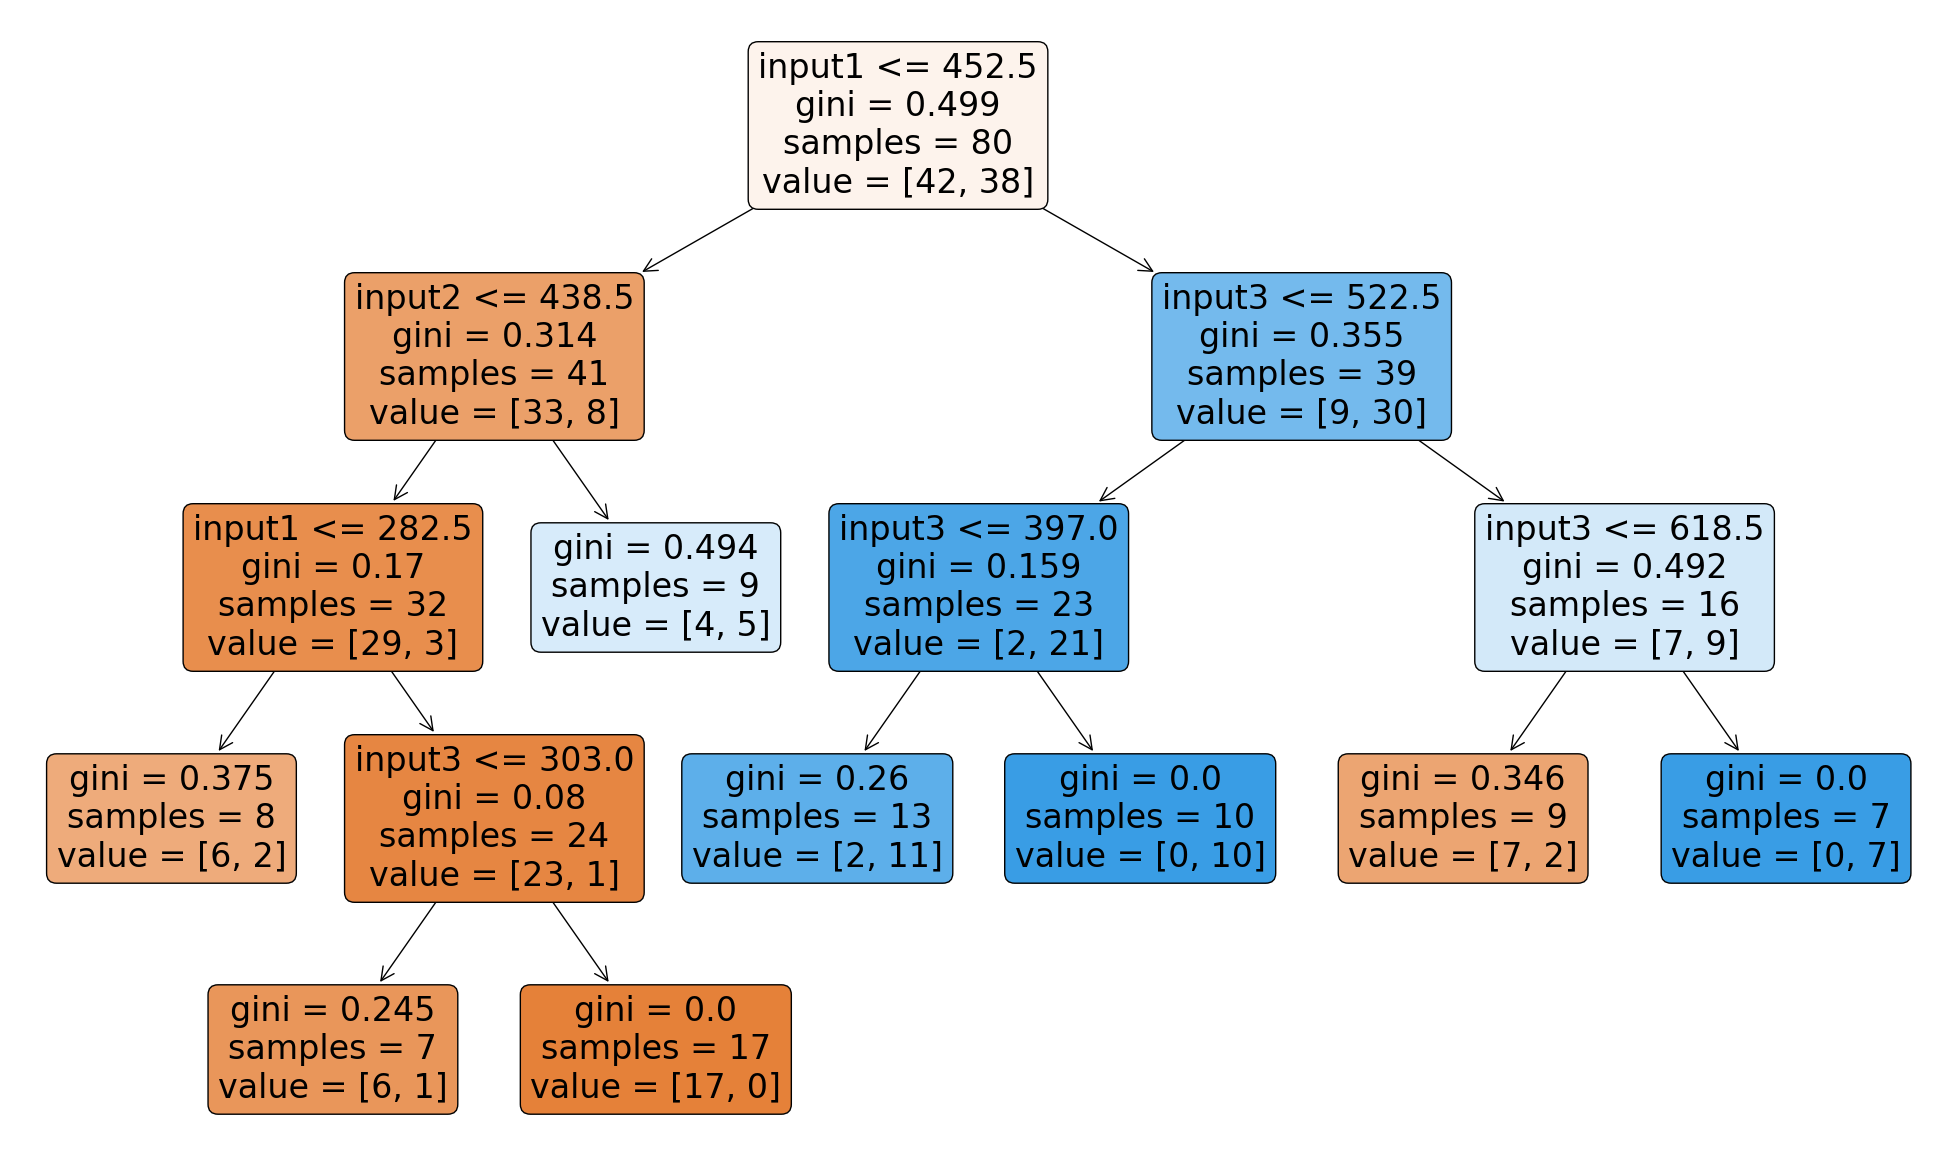

In [14]:
# Plot our decision tree
plt.figure(figsize=(25,15))
tree = plot_tree(clf, 
                 feature_names=X.columns.tolist(),
                 filled=True,
                 rounded=True,
                 fontsize=24)
plt.show()

In [ ]:
#Gini impurity score
#Determine which split point is best
